In [37]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [38]:
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(64, (3, 3), activation = 'relu', input_shape = (64, 64, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid')) #cat and dog

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               1605760   
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 129       
Total para

In [39]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    fill_mode = "nearest",
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    rotation_range=30)

test_datagen = ImageDataGenerator(
    rescale = 1./255)

In [41]:

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [42]:
nb_train_samples = 500
nb_test_samples = 200 
nb_epochs = 50

In [43]:
classifier.fit_generator(training_set,
                         steps_per_epoch= nb_train_samples,
                         epochs = nb_epochs,
                         validation_data = test_set,
                         validation_steps= nb_test_samples)

Epoch 1/50
500/500 [==============================] - 98s 196ms/step - loss: 0.6911 - acc: 0.5306 - val_loss: 0.6743 - val_acc: 0.5631
Epoch 2/50
500/500 [==============================] - 95s 191ms/step - loss: 0.6835 - acc: 0.5588 - val_loss: 0.6645 - val_acc: 0.5924
Epoch 3/50
500/500 [==============================] - 96s 192ms/step - loss: 0.6761 - acc: 0.5752 - val_loss: 0.6559 - val_acc: 0.6220
Epoch 4/50
500/500 [==============================] - 98s 195ms/step - loss: 0.6571 - acc: 0.6064 - val_loss: 0.6344 - val_acc: 0.6412
Epoch 5/50
500/500 [==============================] - 110s 220ms/step - loss: 0.6247 - acc: 0.6461 - val_loss: 0.5822 - val_acc: 0.6877
Epoch 6/50
500/500 [==============================] - 113s 226ms/step - loss: 0.6171 - acc: 0.6535 - val_loss: 0.6475 - val_acc: 0.6218
Epoch 7/50
500/500 [==============================] - 99s 198ms/step - loss: 0.6033 - acc: 0.6709 - val_loss: 0.5570 - val_acc: 0.7105
Epoch 8/50
500/500 [==============================] -

In [67]:
import numpy as np
from keras.preprocessing import image
img1 = image.load_img('dataset/test/cat_or_dog_1.jpg',target_size=(64,64))
img2 = image.load_img('dataset/test/cat_or_dog_2.jpg',target_size=(64,64))

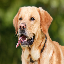

In [57]:
img1

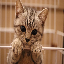

In [68]:
img2

In [61]:
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1, axis = 0)
classifier.predict_classes(img1)

array([[1]])

In [69]:
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2, axis = 0)
classifier.predict_classes(img2)

array([[0]])